In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [12]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
import numpy as np

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.2.0


#### Visualize a toy model with plot_model

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
938/938 [==============================] - 2s 2ms/step - loss: 0.6804 - accuracy: 0.7657
Epoch 2/3
938/938 [==============================] - 1s 1ms/step - loss: 0.4829 - accuracy: 0.8306
Epoch 3/3
938/938 [==============================] - 1s 1ms/step - loss: 0.4445 - accuracy: 0.8418


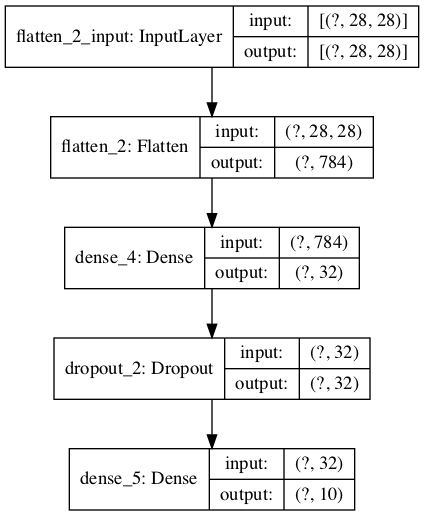

In [11]:
# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="./logs/fit/" 
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=3, 
    callbacks=[tensorboard_callback])

# conda install -c anaconda python-graphviz could fix the grapviz problem
tf.keras.utils.plot_model(model, show_shapes=True)